# Kaggle 신용카드 사기 검출 (Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : 0 (정상), 1 (사기)
* 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [5]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar 17 07:34 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [6]:
import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* 0 (정상) Class와 1 (사기) Class 개수

In [8]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* 0 (정상) Class와 1 (사기) Class 비율

In [9]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [10]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split( )

* X (Input), y (Output) 지정

In [11]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

* With 'Stratify'

In [12]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045,
                                                    stratify = y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [13]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# I. Keras Modeling

> ## 1) Import Keras

* Keras Version 확인

In [14]:
import keras

keras.__version__

'2.4.3'

> ## 2) Model Define

* 모델 신경망 구조 정의

In [15]:
from keras import models
from keras import layers

ccfd = models.Sequential()
ccfd.add(layers.Dense(128, activation = 'relu', input_shape = (29,)))
ccfd.add(layers.Dense(64, activation = 'relu'))
ccfd.add(layers.Dense(32, activation = 'relu'))
ccfd.add(layers.Dense(1, activation = 'sigmoid'))

* 모델 구조 확인

In [16]:
ccfd.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

* 모델 학습방법 설정

In [17]:
ccfd.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['Recall'])

> ## 4) Model Fit

* 모델 학습 수행

In [18]:
%%time

Hist_ccfd = ccfd.fit(X_train, y_train,
                     epochs = 50,
                     batch_size = 1024,
                     validation_data = (X_test, y_test))

Epoch 1/50
195/195 [==============================] - 3s 9ms/step - loss: 0.0966 - recall: 0.1994 - val_loss: 0.0097 - val_recall: 0.8311
Epoch 2/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0187 - recall: 0.7142 - val_loss: 0.0141 - val_recall: 0.7838
Epoch 3/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0121 - recall: 0.7586 - val_loss: 0.0044 - val_recall: 0.8311
Epoch 4/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0136 - recall: 0.7335 - val_loss: 0.0056 - val_recall: 0.8446
Epoch 5/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0062 - recall: 0.7506 - val_loss: 0.0138 - val_recall: 0.7703
Epoch 6/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0112 - recall: 0.7501 - val_loss: 0.0193 - val_recall: 0.6757
Epoch 7/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0234 - recall: 0.7232 - val_loss: 0.0041 - val_recall: 0.7905
Epoch 8/50
195/195 [==============

> ## 5) 학습 결과 시각화

* Loss Visualization

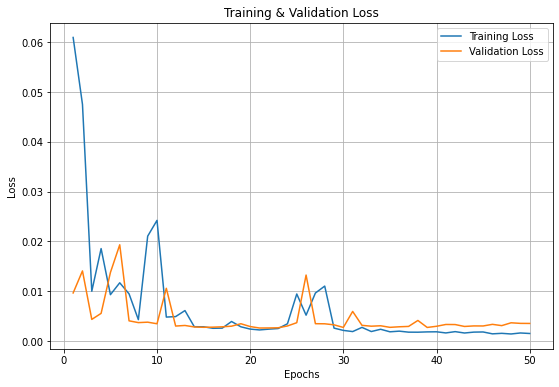

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['loss'])
plt.plot(epochs, Hist_ccfd.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Recall Visualization

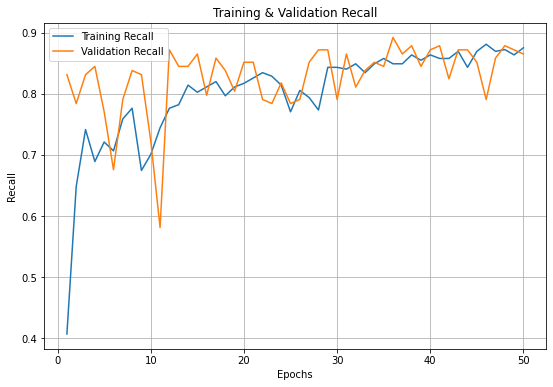

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['recall']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['recall'])
plt.plot(epochs, Hist_ccfd.history['val_recall'])
plt.title('Training & Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [21]:
loss, recall = ccfd.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Recall = {:.5f}'.format(recall))

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0035 - recall: 0.8649
Loss = 0.00354
Recall = 0.86486


> ## 7) Model Predict

In [22]:
y_hat = ccfd.predict_classes(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[85277,    18],
       [   20,   128]])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 1))
print(recall_score(y_test, y_hat, pos_label = 1))

0.9995552590615966
0.8767123287671232
0.8648648648648649


# 
# 
# 
# The End
# 
# 
# 